In [1]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.noise import NormalActionNoise

# Create the environment
env = gym.make("highway-v1")

# Wrap the environment
env.reset()

(array([[ 1.        ,  0.9139248 ,  0.5       ,  0.3125    ,  0.        ],
        [ 1.        ,  0.11337005, -0.5       , -0.03262927,  0.        ],
        [ 1.        ,  0.21053725,  0.        , -0.0497625 ,  0.        ],
        [ 1.        ,  0.3114394 ,  0.25      , -0.01495678,  0.        ],
        [ 1.        ,  0.41079375, -0.25      , -0.03538581,  0.        ]],
       dtype=float32),
 {'speed': 25,
  'crashed': False,
  'action': 4,
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 0.6666666666666666,
   'high_speed_reward': 0.8333333333333334,
   'on_road_reward': 1.0,
   'reverse_reward': 0.0,
   'stopping_penalty': 0}})

In [2]:
# Create the SAC model
model = DQN(
    "MlpPolicy",
    env,
    policy_kwargs=dict(net_arch=[256, 256]),
    learning_rate=5e-4,
    buffer_size=15000,
    learning_starts=200,
    batch_size=32,
    gamma=0.8,
    train_freq=1,
    gradient_steps=1,
    target_update_interval=50,
    verbose=1,
    tensorboard_log="highway_dqn",
)

# Train the model
model.learn(total_timesteps=15000,tb_log_name = 'DQN_1')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn\DQN_1_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 8.29     |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5        |
|    time_elapsed     | 7        |
|    total_timesteps  | 40       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 9.95     |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5        |
|    time_elapsed     | 18       |
|    total_timesteps  | 96       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |


In [3]:
model.learn(total_timesteps=10000, tb_log_name="DQN_1",reset_num_timesteps=False)

Logging to highway_dqn\DQN_1_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.5     |
|    ep_rew_mean      | 30.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 4        |
|    time_elapsed     | 26       |
|    total_timesteps  | 15129    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.00215  |
|    n_updates        | 14928    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.1     |
|    ep_rew_mean      | 31.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 4        |
|    time_elapsed     | 57       |
|    total_timesteps  | 15283    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 

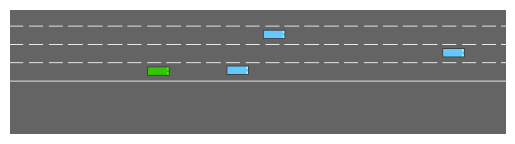

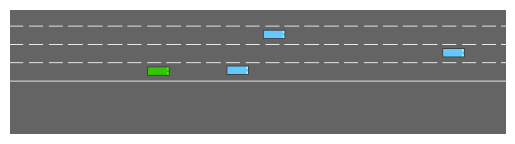

In [8]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
from IPython.display import clear_output, display

# modewl = TD3.load("td3_highway_model")
# # Create the environment
# env = gym.make("highway-v1",render_mode="rgb_array")

# # Configure the environment for continuous actions
# env.unwrapped.configure({
#     "action": {"type": "ContinuousAction"},
#     "duration": 40,  # [s]
#     "lanes_count": 4,
#     "vehicles_count": 50,
#     "controlled_vehicles": 1,
#     "initial_lane_id": None,
#     "ego_spacing": 2,
#     "collision_reward": -1,  
#     "right_lane_reward": 0.4,
#     "high_speed_reward": 0.8,
#     "lane_change_reward": 0,
#     "reward_speed_range": [10, 30],
#     "reverse_reward": -2,
#     "stopping_penalty": -2,
#     "normalize_reward": True,
#     "offroad_terminal": False,
# })

# Reset the environment
obs, info = env.reset()
done = False

# Run the simulation loop
while not done:
    # Sample a random action
    #action = env.action_space.sample()
    action, _ = model.predict(obs, deterministic=False)

    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)


    # Render the environment as an image
    frame = env.render()

    # Display the rendered frame
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)  # Clear the previous frame
    display(plt.gcf())       # Display the current frame

    # Check if the episode is done
    done = truncated


# Close the environment
env.close()

In [3]:
%load_ext tensorboard
%tensorboard --logdir "highway_dqn"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
model = DQN.load("DQN_highwayv1")

In [4]:
# Save the trained model
model.save("DQN_highwayv1")